<h1><strong>Modeling</strong></h1>

<h1>Team Science Bros</h1>
In this notebook file you shall find Modeling script.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Importing and Reading the dataset as df 
df = pd.read_csv('/content/Stroke dataset.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


<h1> Normalizing and Modelling <h1>

In [ ]:
# Define X (Feature) and Y (Target)

# X consist data from 'age' and 'avg_glucose_level' column (numeric)
X = df.iloc[:, [1, 7]].values

# Y consist data from 'stroke' column
y = df.iloc[:, 10].values

In [ ]:
# Split dataset to traning and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# summarize class distribution
print(Counter(y))
# defining undersampling strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_under, y_under = undersample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_under))
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size = 0.25, random_state = 0)

Counter({0: 4700, 1: 209})
Counter({0: 209, 1: 209})


In [ ]:
# Data normalization using scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Modelling
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

classifier_KNN = KNeighborsClassifier()
classifier_DT = DecisionTreeClassifier()
classifier_RF = RandomForestClassifier()

In [ ]:
#K- Nearest Neighbors
from sklearn.model_selection import cross_val_score
classifier_KNN.fit(X_train, y_train)
KNN = classifier_KNN.predict(X_test)
dataEvaluation=pd.DataFrame({"y_Prediksi":KNN, "y_Actual":y_test})
accuracies = cross_val_score(estimator = classifier_KNN, X = X_train, y = y_train, cv = 10)
dataEvaluation
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
print(confusion_matrix(y_test, KNN))
print('accuracy score :',accuracy_score(KNN,y_test))
print('Precision Score :',precision_score(KNN, y_test, average='weighted'))
print('recall score :',recall_score(KNN,y_test, average='weighted'))
print('f1_score :',f1_score(KNN, y_test, average='weighted'))
print("K-Fold Validation Mean Accuracy: {:.2f} ".format(accuracies.mean()))
print('\n')
print(classification_report(y_test, KNN))

[[34 19]
 [ 8 44]]
accuracy score : 0.7428571428571429
Precision Score : 0.7642960812772133
recall score : 0.7428571428571429
f1_score : 0.7454462242562929
K-Fold Validation Mean Accuracy: 0.73 


              precision    recall  f1-score   support

           0       0.81      0.64      0.72        53
           1       0.70      0.85      0.77        52

    accuracy                           0.74       105
   macro avg       0.75      0.74      0.74       105
weighted avg       0.75      0.74      0.74       105



In [ ]:
#Decision Tree
classifier_DT.fit(X_train, y_train)
DT = classifier_DT.predict(X_test)
dataEvaluation=pd.DataFrame({"y_Prediksi":DT, "y_Actual":y_test})
accuracies = cross_val_score(estimator = classifier_DT, X = X_train, y = y_train, cv = 10)
dataEvaluation
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
print(confusion_matrix(y_test, DT))
print('accuracy score :',accuracy_score(DT,y_test))
print('Precision Score :',precision_score(DT, y_test, average='weighted'))
print('recall score :',recall_score(DT,y_test, average='weighted'))
print('f1_score :',f1_score(DT, y_test, average='weighted'))
print("K-Fold Validation Mean Accuracy: {:.2f} ".format(accuracies.mean()))
print('\n')
print(classification_report(y_test, DT))


[[37 16]
 [18 34]]
accuracy score : 0.6761904761904762
Precision Score : 0.6770336581657337
recall score : 0.6761904761904762
f1_score : 0.6763668430335097
K-Fold Validation Mean Accuracy: 0.67 


              precision    recall  f1-score   support

           0       0.67      0.70      0.69        53
           1       0.68      0.65      0.67        52

    accuracy                           0.68       105
   macro avg       0.68      0.68      0.68       105
weighted avg       0.68      0.68      0.68       105



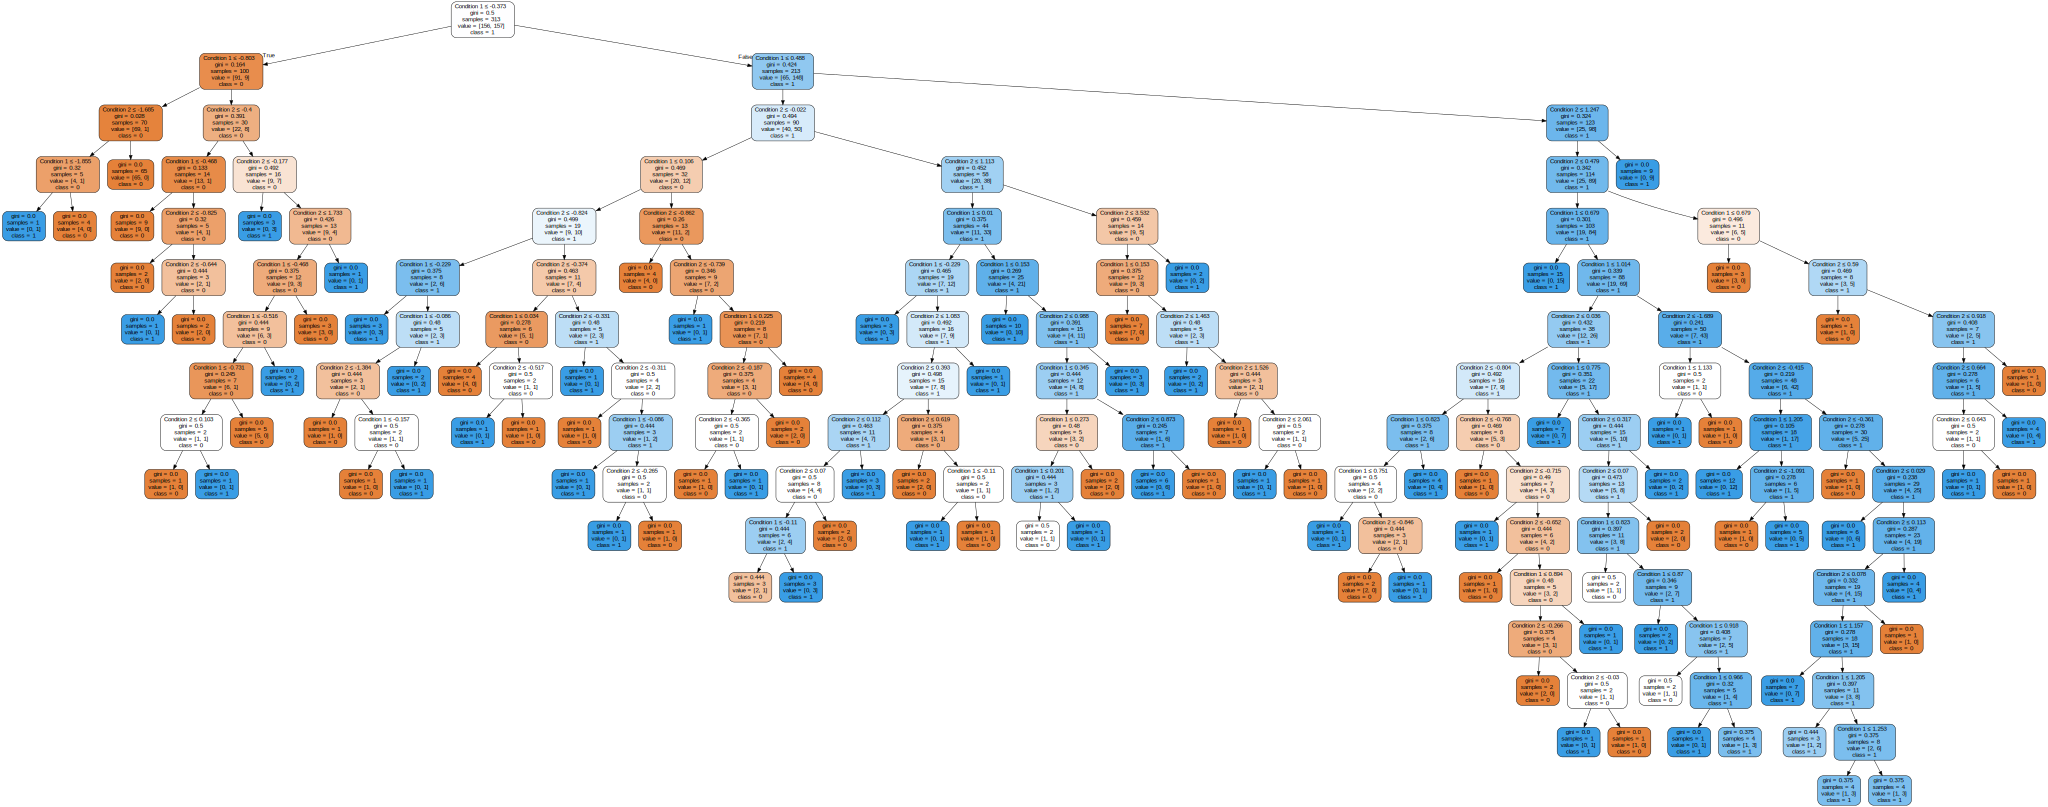

In [ ]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(classifier_DT, out_file=None, feature_names=["Condition 1", "Condition 2"], class_names=["0", "1"], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
#Random Forest 
classifier_RF.fit(X_train, y_train)
RF = classifier_RF.predict(X_test)
dataEvaluation=pd.DataFrame({"y_Prediksi":RF, "y_Actual":y_test})
accuracies = cross_val_score(estimator = classifier_RF, X = X_train, y = y_train, cv = 10)
dataEvaluation
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
print(confusion_matrix(y_test, RF))
print('accuracy score :',accuracy_score(RF,y_test))
print('Precision Score :',precision_score(RF, y_test, average='weighted'))
print('recall score :',recall_score(RF,y_test, average='weighted'))
print('f1_score :',f1_score(RF, y_test, average='weighted'))
print("K-Fold Validation Mean Accuracy: {:.2f} ".format(accuracies.mean()))
print('\n')
print(classification_report(y_test, RF))


[[35 18]
 [ 9 43]]
accuracy score : 0.7428571428571429
Precision Score : 0.757132490151358
recall score : 0.7428571428571429
f1_score : 0.7445462483871388
K-Fold Validation Mean Accuracy: 0.69 


              precision    recall  f1-score   support

           0       0.80      0.66      0.72        53
           1       0.70      0.83      0.76        52

    accuracy                           0.74       105
   macro avg       0.75      0.74      0.74       105
weighted avg       0.75      0.74      0.74       105



<h3><strong>Results</strong></h3>


`**We have successfully implemented K-Nearest Neighbors, Decision Tree, and Random Forest algorithms. Each of these has a K-Fold Validation Mean Accuracy of 73%, 67%, and 69% respectively.From our analysis, we have concluded that using the K-Nearest Neighbors algorithm for solving this problem is the best choice.**`